# Graphlab test notebook

Test whether it is possible to efficiently have a multigraph without duplicating values on the nodes.

In [1]:
import os
import time
import numpy as np
import scipy as sp
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphlab as gl

from collections import OrderedDict
import numpy.random


# Customize plot colors for dark backgrounds
%matplotlib inline
mpl.rcParams['axes.edgecolor'] = 'grey'
mpl.rcParams['grid.color'] = '#66CCCC'
mpl.rcParams['text.color'] = '#0EBFE9'
mpl.rcParams['xtick.color'] = '#66CCCC'
mpl.rcParams['ytick.color'] = '#66CCCC'
mpl.rcParams['axes.labelcolor'] = '#0EBFE9'

[INFO] Start server at: ipc:///tmp/graphlab_server-81466 - Server binary: /usr/local/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1430324881.log
[INFO] GraphLab Server Version: 1.3.0


In [48]:
def generate_data(nb_users, nb_movies, max_rating=5):
    u = np.random.randint(1, nb_users + 1, nb_users)
    m = np.random.randint(1, nb_movies + 1, nb_movies)
    # unique pairs
    v = set(zip(u, m))
    data = {'user_id': list(), 'movie_id': list(), 'rating': list(), 'type': list()}
    for (u, m), r in zip(v, np.random.randint(1, max_rating + 1, nb_users)):
        data['user_id'].append(u)
        data['movie_id'].append(-m)  # negative id to distinguish between user and movie in graph
        data['rating'].append(r)
        data['type'].append('um')  # edge type user-movie
    return data

user_movie = gl.SFrame(generate_data(5, 5))
user_movie

movie_id,rating,type,user_id
-3,4,um,1
-1,4,um,5
-1,4,um,3
-2,5,um,5
-1,1,um,2


### Create vertices with respective types

In [49]:
m = gl.SFrame({'__id': user_movie['movie_id']})
m['ntype'] = 'movie'
u = gl.SFrame({'__id': user_movie['user_id']})
u['ntype'] = 'user'
v = m.append(u)
v

__id,ntype
-3,movie
-1,movie
-1,movie
-2,movie
-1,movie
1,user
5,user
3,user
5,user
2,user


In [50]:
g = gl.SGraph(vertices=v, edges=user_movie, src_field='user_id', dst_field='movie_id')

### Add movie to movie edges

In [1]:
import networkx as nx

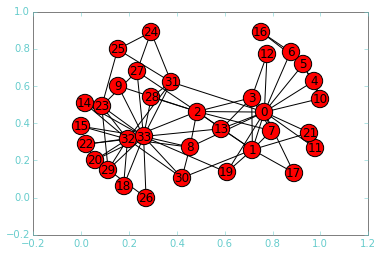

In [2]:
nx.draw_networkx(nx.karate_club_graph())